# Generate $k$mers
### Author: Ehsan Gharib-Nezhad


In [35]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import  LabelEncoder, OneHotEncoder
import random

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# Dataset 1: Human dataset
# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [36]:
# Load datasets
human = pd.read_csv('../outputs/processed_human_sequence.csv')

In [37]:
human.head()

,sequence,class,sequence_length,A_count,T_count,G_count,C_count
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,207,80,45,13,69
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,681,206,174,71,230
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1686,476,483,393,334
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1206,339,363,294,210
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,1437,417,406,326,288


## Generate Kmers
`Defination`: k-mers are substrings of length k contained within a biological sequence.k-mers are composed of nucleotides (i.e. A, T, G, and C) [[Ref]](https://en.wikipedia.org/wiki/K-mer)

In [38]:
def CreateKmers(sequence, kmer_length):
    """
    This function calculate k-mers  
    Inputs: 
        - sequence: which ic DNA sequence length, for example "ATGCCCCAACTAAATACTACCGTATGGCCCACCAT..."
        - kmer_length: which is 1 ... len(sequence)
    OUTPUTS: 
        - kmers
            example: if kmer_length=2, then: "AT, GC, CC, CA, AC, ..."
    """  
    return [sequence[x:x+kmer_length].lower() for x in range(len(sequence) - kmer_length + 1)]

In [39]:
human['2mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 2), axis=1)
human['3mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 3), axis=1)
human['4mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 4), axis=1)
human['5mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 5), axis=1)
human['6mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 6), axis=1)
human['7mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 7), axis=1)
human['8mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 8), axis=1)
human['9mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 9), axis=1)
human['10mer'] = human.apply(lambda x: CreateKmers(x['sequence'], 10), axis=1)
# human = human.drop('sequence', axis=1)

In [40]:
human.head()

,sequence,class,sequence_length,A_count,T_count,G_count,C_count,2mer,3mer,4mer,5mer,6mer,7mer,8mer,9mer,10mer
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,207,80,45,13,69,"[at, tg, gc, cc, cc, cc, ca, aa, ac, ct, ta, a...","[atg, tgc, gcc, ccc, ccc, cca, caa, aac, act, ...","[atgc, tgcc, gccc, cccc, ccca, ccaa, caac, aac...","[atgcc, tgccc, gcccc, cccca, cccaa, ccaac, caa...","[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...","[atgcccc, tgcccca, gccccaa, ccccaac, cccaact, ...","[atgcccca, tgccccaa, gccccaac, ccccaact, cccaa...","[atgccccaa, tgccccaac, gccccaact, ccccaacta, c...","[atgccccaac, tgccccaact, gccccaacta, ccccaacta..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,681,206,174,71,230,"[at, tg, ga, aa, ac, cg, ga, aa, aa, aa, at, t...","[atg, tga, gaa, aac, acg, cga, gaa, aaa, aaa, ...","[atga, tgaa, gaac, aacg, acga, cgaa, gaaa, aaa...","[atgaa, tgaac, gaacg, aacga, acgaa, cgaaa, gaa...","[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...","[atgaacg, tgaacga, gaacgaa, aacgaaa, acgaaaa, ...","[atgaacga, tgaacgaa, gaacgaaa, aacgaaaa, acgaa...","[atgaacgaa, tgaacgaaa, gaacgaaaa, aacgaaaat, a...","[atgaacgaaa, tgaacgaaaa, gaacgaaaat, aacgaaaat..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1686,476,483,393,334,"[at, tg, gt, tg, gt, tg, gg, gc, ca, at, tt, t...","[atg, tgt, gtg, tgt, gtg, tgg, ggc, gca, cat, ...","[atgt, tgtg, gtgt, tgtg, gtgg, tggc, ggca, gca...","[atgtg, tgtgt, gtgtg, tgtgg, gtggc, tggca, ggc...","[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...","[atgtgtg, tgtgtgg, gtgtggc, tgtggca, gtggcat, ...","[atgtgtgg, tgtgtggc, gtgtggca, tgtggcat, gtggc...","[atgtgtggc, tgtgtggca, gtgtggcat, tgtggcatt, g...","[atgtgtggca, tgtgtggcat, gtgtggcatt, tgtggcatt..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,1206,339,363,294,210,"[at, tg, gt, tg, gt, tg, gg, gc, ca, at, tt, t...","[atg, tgt, gtg, tgt, gtg, tgg, ggc, gca, cat, ...","[atgt, tgtg, gtgt, tgtg, gtgg, tggc, ggca, gca...","[atgtg, tgtgt, gtgtg, tgtgg, gtggc, tggca, ggc...","[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...","[atgtgtg, tgtgtgg, gtgtggc, tgtggca, gtggcat, ...","[atgtgtgg, tgtgtggc, gtgtggca, tgtggcat, gtggc...","[atgtgtggc, tgtgtggca, gtgtggcat, tgtggcatt, g...","[atgtgtggca, tgtgtggcat, gtgtggcatt, tgtggcatt..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,1437,417,406,326,288,"[at, tg, gc, ca, aa, ac, ca, ag, gc, ca, at, t...","[atg, tgc, gca, caa, aac, aca, cag, agc, gca, ...","[atgc, tgca, gcaa, caac, aaca, acag, cagc, agc...","[atgca, tgcaa, gcaac, caaca, aacag, acagc, cag...","[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...","[atgcaac, tgcaaca, gcaacag, caacagc, aacagca, ...","[atgcaaca, tgcaacag, gcaacagc, caacagca, aacag...","[atgcaacag, tgcaacagc, gcaacagca, caacagcat, a...","[atgcaacagc, tgcaacagca, gcaacagcat, caacagcat..."


### Save the human kmer-ized sequence dataset

In [41]:
human.columns

Index(['sequence', 'class', 'sequence_length', 'A_count', 'T_count', 'G_count',
       'C_count', '2mer', '3mer', '4mer', '5mer', '6mer', '7mer', '8mer',
       '9mer', '10mer'],
      dtype='object')

In [48]:
human.to_csv('../datasets/human_kmer_dataset.csv', columns=human.columns, index=False, encoding='utf-8')

---

# Explore the frequency of A, T, G, C bases in the dimer, trimer, etc.

In [16]:
def freq_table(text, count=None):

    freqs = FreqDist(text).most_common()
    prob = [round(x[1]/len(text),4) for x in freqs]

    freq = zip(freqs,prob)

    comp_freqs = []
    for s,p in freq:
        comp_freqs.append([s[0],s[1],p])

    comp_freqs.sort(key=lambda tup: tup[1], reverse=True) #Sort the list so it's in order, big to small

    if count == None:
        most = comp_freqs[:26]    
        hapax = comp_freqs[:-25:-1]
    else:
        most = comp_freqs[:count + 1]
        hapax = comp_freqs[:-count:-1]

    print('Most Common \t\t  Least Common')

    for i in zip(most, hapax):
        print(i[0], " "*(24-len(str(i[0]))),i[1])

In [17]:
freq_table(human['2mer'][0], count=10)

Most Common 		  Least Common
['aa', 36, 0.1748]        ['gg', 1, 0.0049]
['cc', 31, 0.1505]        ['gt', 2, 0.0097]
['ac', 22, 0.1068]        ['ag', 3, 0.0146]
['ca', 20, 0.0971]        ['cg', 3, 0.0146]
['at', 19, 0.0922]        ['ga', 4, 0.0194]
['ta', 19, 0.0922]        ['gc', 5, 0.0243]
['ct', 15, 0.0728]        ['tg', 6, 0.0291]
['tc', 11, 0.0534]        ['tt', 9, 0.0437]
['tt', 9, 0.0437]         ['tc', 11, 0.0534]


In [18]:
freq_table(human['3mer'][0], count=10)

Most Common 		  Least Common
['aaa', 19, 0.0927]       ['tag', 1, 0.0049]
['ccc', 13, 0.0634]       ['ttg', 1, 0.0049]
['cca', 10, 0.0488]       ['gct', 1, 0.0049]
['acc', 10, 0.0488]       ['cgc', 1, 0.0049]
['aac', 8, 0.039]         ['tcg', 1, 0.0049]
['aat', 8, 0.039]         ['gtt', 1, 0.0049]
['caa', 7, 0.0341]        ['tgt', 1, 0.0049]
['cta', 7, 0.0341]        ['tct', 1, 0.0049]
['taa', 7, 0.0341]        ['cga', 1, 0.0049]


In [26]:
def report_top_kmers(seqence, 
                     kmers, 
                     gene_family_class, 
                     top_numbers):
    
    plt.figure(figsize=(12, 4))
    plt.title(f'Top {top_numbers} {kmers} in gene family class = {gene_family_class}', fontsize = 16)
    plt.xlabel(f'{kmers} labels', fontsize = 12)
    plt.ylabel(f'{kmers} count %', fontsize = 12)
    freqs = FreqDist(
        sum(seqence[seqence['class'] == gene_family_class][kmers].to_list(),[])).most_common(top_numbers)

    x = [x[0] for x in freqs]
    y = [x[1] for x in freqs]

    sns.barplot(x=x, y=(y/np.max(y))*100)

    plt.xticks(fontsize=12,rotation=30)
    plt.yticks(fontsize=12);



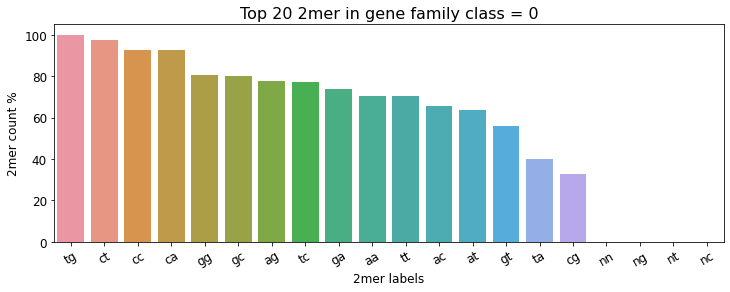

In [27]:
report_top_kmers(human, 
                 kmers = '2mer', 
                 gene_family_class = 0, 
                 top_numbers = 20)

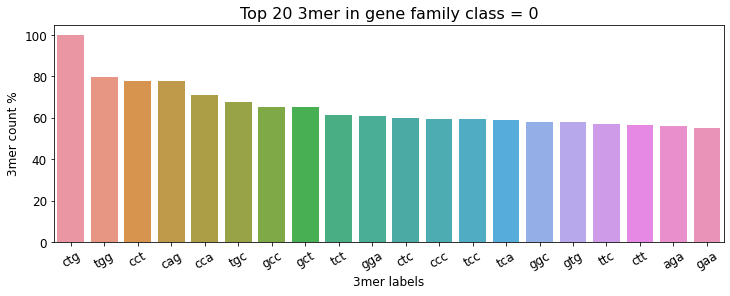

In [28]:
report_top_kmers(human, 
                 kmers = '3mer', 
                 gene_family_class = 0, 
                 top_numbers = 20)

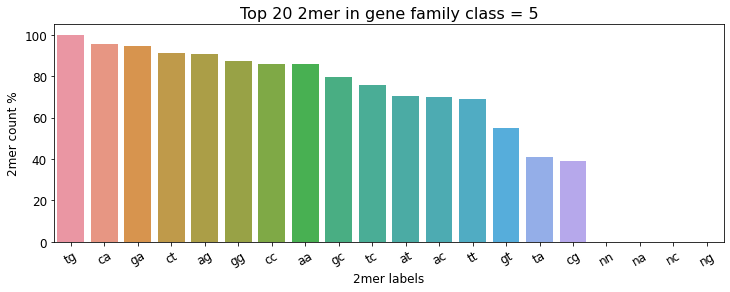

In [29]:
report_top_kmers(human, 
                 kmers = '2mer', 
                 gene_family_class = 5, 
                 top_numbers = 20)

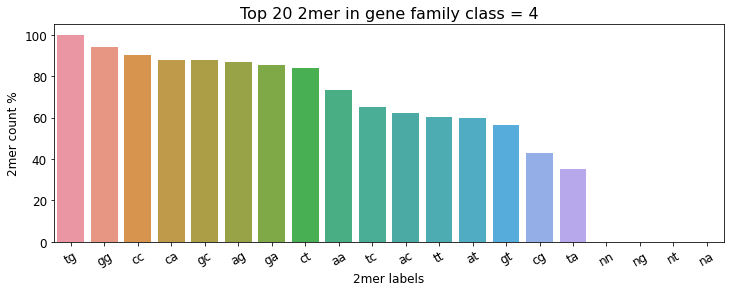

In [30]:
report_top_kmers(human, 
                 kmers = '2mer', 
                 gene_family_class = 4, 
                 top_numbers = 20)

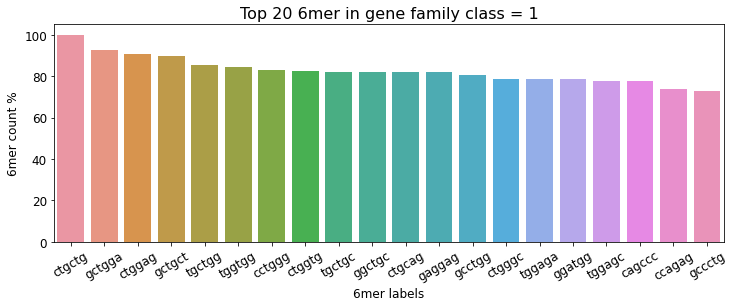

In [31]:
report_top_kmers(human, 
                 kmers = '6mer', 
                 gene_family_class = 1, 
                 top_numbers = 20)

# Modeling

---

We may want to test lots of different values of hyperparameters in our CountVectorizer.

<details><summary>Why do we need a pipeline to GridSearch over our CountVectorizer hyperparameters?</summary>
    
- The CountVectorizer is a transformer.
- Transformers have .fit() and .transform() methods, but cannot do .predict().
- In order to GridSearch over hyperparameters, we need some way to score our model performance.
- A pipeline stacks together one or more transformers with an estimator at the end. The estimator allows us to .predict() and get a score!
</details>

In [42]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split([' '.join(x) for x in human['10mer']],
                                                    human['class'],
                                                    test_size=0.33,
                                                    stratify=human['class'],
                                                    random_state=42)

## Baseline accuracy

We need to calculate baseline accuracy in order to tell if our model is better than null model.

In [43]:
pd.DataFrame(y_train).value_counts(normalize=True), pd.DataFrame(y_test).value_counts(normalize=True)

(class
 6        0.306408
 4        0.162236
 3        0.153374
 1        0.122018
 0        0.121336
 2        0.079755
 5        0.054874
 dtype: float64,
 class
 6        0.307054
 4        0.162517
 3        0.153527
 1        0.121715
 0        0.121024
 2        0.079530
 5        0.054633
 dtype: float64)

In [44]:
cvec = CountVectorizer(ngram_range=(4,4))

In [45]:
# Fit & transform the vectorizer on our training corpus.
Xcv_train = cvec.fit_transform(X_train)

In [46]:
# to convert sparse matrix to dense matrix
Xcv_train = pd.DataFrame(Xcv_train.todense(),
                           columns = cvec.get_feature_names() )
Xcv_train.head()

,aaaaaaaaaa aaaaaaaaaa aaaaaaaaac aaaaaaaaca,aaaaaaaaaa aaaaaaaaaa aaaaaaaaac aaaaaaaacc,aaaaaaaaaa aaaaaaaaaa aaaaaaaaac aaaaaaaacg,aaaaaaaaaa aaaaaaaaaa aaaaaaaaag aaaaaaaaga,aaaaaaaaaa aaaaaaaaaa aaaaaaaaag aaaaaaaagc,aaaaaaaaaa aaaaaaaaac aaaaaaaaca aaaaaaacag,aaaaaaaaaa aaaaaaaaac aaaaaaaacc aaaaaaaccc,aaaaaaaaaa aaaaaaaaac aaaaaaaacg aaaaaaacgc,aaaaaaaaaa aaaaaaaaag aaaaaaaaga aaaaaaagaa,aaaaaaaaaa aaaaaaaaag aaaaaaaaga aaaaaaagag,...,ttttttttcc tttttttcct ttttttccta tttttcctaa,ttttttttcc tttttttcct ttttttcctc tttttcctcc,ttttttttct tttttttctt ttttttcttg tttttcttga,ttttttttgc tttttttgct ttttttgctc tttttgctct,ttttttttgg tttttttggg ttttttggga tttttgggag,ttttttttgt tttttttgtt ttttttgtta tttttgttat,tttttttttc ttttttttca tttttttcac ttttttcacc,tttttttttc ttttttttcc tttttttcct ttttttcctc,tttttttttg ttttttttgg tttttttggg ttttttggga,tttttttttg ttttttttgt tttttttgtt ttttttgtta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
Xcv_train.shape

(2934, 1242018)

In [64]:
# Transform the test corpus.
Xcv_test = cvec.transform(X_test)

In [65]:
# to convert sparse matrix to dense matrix
Xcv_test = pd.DataFrame(Xcv_test.todense(),
                           columns = cvec.get_feature_names() )
Xcv_test.head()

,aaaaaaaaaa aaaaaaaaaa aaaaaaaaac aaaaaaaaca,aaaaaaaaaa aaaaaaaaaa aaaaaaaaac aaaaaaaacc,aaaaaaaaaa aaaaaaaaaa aaaaaaaaac aaaaaaaacg,aaaaaaaaaa aaaaaaaaaa aaaaaaaaag aaaaaaaaga,aaaaaaaaaa aaaaaaaaaa aaaaaaaaag aaaaaaaagc,aaaaaaaaaa aaaaaaaaac aaaaaaaaca aaaaaaacag,aaaaaaaaaa aaaaaaaaac aaaaaaaacc aaaaaaaccc,aaaaaaaaaa aaaaaaaaac aaaaaaaacg aaaaaaacgc,aaaaaaaaaa aaaaaaaaag aaaaaaaaga aaaaaaagaa,aaaaaaaaaa aaaaaaaaag aaaaaaaaga aaaaaaagag,...,ttttttttcc tttttttcct ttttttccta tttttcctaa,ttttttttcc tttttttcct ttttttcctc tttttcctcc,ttttttttct tttttttctt ttttttcttg tttttcttga,ttttttttgc tttttttgct ttttttgctc tttttgctct,ttttttttgg tttttttggg ttttttggga tttttgggag,ttttttttgt tttttttgtt ttttttgtta tttttgttat,tttttttttc ttttttttca tttttttcac ttttttcacc,tttttttttc ttttttttcc tttttttcct ttttttcctc,tttttttttg ttttttttgg tttttttggg ttttttggga,tttttttttg ttttttttgt tttttttgtt ttttttgtta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
Xcv_test.shape

(1446, 1242018)

In [67]:
#The fit method of KNN class is called to train the algorithm on the training data, 
#which is passed as a parameter to the fit method
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors=5)
KNNclassifier.fit(Xcv_train, y_train)

KNeighborsClassifier()

In [68]:
# enter all test datatest in model 
y_pred = KNNclassifier.predict(Xcv_test) 

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[122   0   0   0   0   0  53]
 [  0 131   0   0   0   0  45]
 [  7   0  85   0   0   0  23]
 [  0   0   0 173   0   0  49]
 [ 15   0   0   0 154   0  66]
 [  4   0   0   0   0  49  26]
 [  0   0   0   0   0   0 444]]
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       175
           1       1.00      0.74      0.85       176
           2       1.00      0.74      0.85       115
           3       1.00      0.78      0.88       222
           4       1.00      0.66      0.79       235
           5       1.00      0.62      0.77        79
           6       0.63      1.00      0.77       444

    accuracy                           0.80      1446
   macro avg       0.92      0.75      0.81      1446
weighted avg       0.86      0.80      0.80      1446



In [70]:
#The fit method of KNN class is called to train the algorithm on the training data, 
#which is passed as a parameter to the fit method
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(Xcv_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = rfc.predict(Xcv_test) 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [520]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [521]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. Multinomial Naive Bayes (estimator)

pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('mnb', MultinomialNB())
])

In [522]:
# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and 2-grams).

pipe_params = {
    'cvec__max_features': [3, 5, 10],
#     'cvec__min_df': [2, 3],
#     'cvec__max_df': [.9, .95],
#     'cvec__ngram_range': [(1,1), (1,2)]
}

In [523]:
# Instantiate GridSearchCV.

gs = GridSearchCV(pipe, # what object are we optimizing?
                  pipe_params, # what parameters values are we searching?
                cv =5) # 5-fold cross-validation.

In [524]:
# Fit GridSearch to training data.
# Fit GridSearch to training data.
gs.fit(X_train, y_train )

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid={'cvec__max_features': [3, 5, 10]})

In [525]:
# What's the best score?

gs.best_params_

{'cvec__max_features': 3}

In [526]:
# Score model on training set.

gs.score(X_train, y_train) , gs.score(X_test, y_test)

(0.2737854310245324, 0.2737853858775288)